In [43]:
%matplotlib inline
import numpy as np
from scipy.ndimage.measurements import label,find_objects,center_of_mass
import PIVutils

In [44]:
S = np.loadtxt('BugData.csv', delimiter=',')

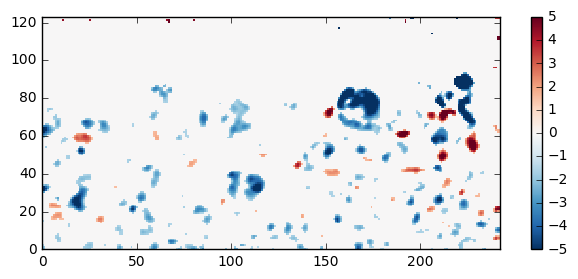

In [45]:
[f, ax] = PIVutils.plotScalarField(S,bound=5)

In [46]:
Thresh = 35 

In [53]:
uSize = S.shape
    
labeled_array, num_features = label(S)

#print(np.unique(labeled_array))
#print(np.unique(labeled_array[:,:,0]))
#print(labeled_array.shape)

print('There are ', num_features, ' features identified')

if Thresh is not None:
    loc = find_objects(labeled_array)
    labeled_array_out = labeled_array.copy()

    counts = np.bincount(labeled_array.ravel())

    ind = np.where(counts>Thresh)[0][1:]
    mask = np.in1d(labeled_array.ravel(), ind).reshape(labeled_array.shape)
    labeled_array_out[~mask] = 0

    [_, labeled_array_out] = np.unique(labeled_array_out,return_inverse=True)
    labeled_array_out = labeled_array_out.reshape(labeled_array.shape)

    num_features_out = len(ind)

    print('A total of ', num_features_out, ' are larger than the threshold size')
else:
    labeled_array_out = labeled_array
    num_features_out = num_features

#a = labeled_array_out[:,:,535]
#b = a.copy()
#c = list(range(uSize[1]))
#b[:,:] = list(range(uSize[1])))
#for i in np.unique(a):
    #print(np.unique(a)[15])
    #print(a[a==i])

#features_per_frame = np.zeros(uSize[2],dtype=int);
#cent = [];
#for i in range(uSize[2]):
    #features_per_frame[i] = len(np.unique(labeled_array_out[:,:,i])[1:])
cent = center_of_mass(S,labeled_array_out,np.unique(labeled_array_out)[1:])

There are  177  features identified
A total of  13  are larger than the threshold size


In [54]:
cent[11]

(696.28820197528614, 213.38909911471836)

In [55]:
S.shape    #Cent must be less than these numbers

(123, 242)

In [56]:
np.unique(labeled_array_out)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [57]:
num_features_out

13